In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

from pathlib import Path

%load_ext autoreload
%autoreload 2

In [2]:
# open file

data_folder = Path("../../../data/DryBeanDataset/")
model_folder = Path("../../../models/DryBeanDataset")
image_folder = Path("../../../images/DryBeanDataset")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [3]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
class_names = np.array(list(labels_dict.keys()))
data["Class"] = data["Class"].map(labels_dict)

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

In [4]:
# normalize
data_normal = (X-X.min())/(X.max()-X.min())

pca = skl.decomposition.PCA(n_components=2)
pca_features = pca.fit_transform(data_normal)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df["Class"] = labels

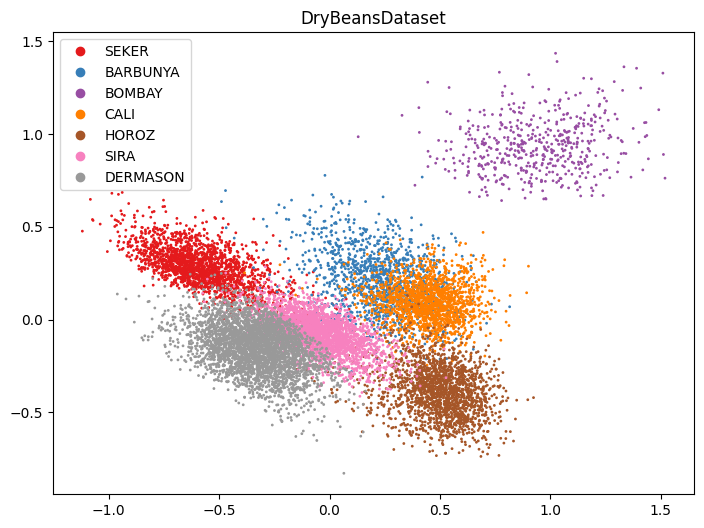

In [11]:
legend_labels = list(class_names)
#legend_labels = [f'{class_idx}' for class_idx in labels.unique()]

NUM_COLORS = 7

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
fig.set_size_inches(8.27, 6)
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

scatter = ax.scatter(pca_features[:,0], pca_features[:,1], s=1, c=labels, cmap='Set1');
plt.legend(handles = scatter.legend_elements()[0], labels=legend_labels);
plt.title("DryBeansDataset")

plt.savefig(image_folder / 'dry_beans_dataset_visualization.jpg', dpi=300, bbox_inches='tight')

In [7]:
"""
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], s=0.1, c=labels_small);
"""

"\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], s=0.1, c=labels_small);\n"